In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("../data/processed/GOOGL.csv", parse_dates=['Date']).set_index('Date')

df.head()

NameError: name 'pd' is not defined

In [24]:
df.drop('NaT')

,Price,Open,High,Low,Close,Volume,log_returns
Date,,,,,,,
2020-02-28,2,63.48535365075221,66.88004494343048,63.18145503464202,66.72062683105469,80198000,0.018311
2020-03-02,3,67.32544584408515,69.1229231286208,66.02067405586332,69.06563568115234,55430000,0.034543
2020-03-03,4,69.63158946211831,70.15518886051058,66.2219446617251,66.64441680908203,56602000,-0.035686
2020-03-04,5,67.70256753542472,68.88926748762059,66.6085339749811,68.83048248291016,47598000,0.032275
2020-03-05,6,67.03449374191095,67.4370414491301,64.84692814514692,65.50055694580078,54380000,-0.049588
...,...,...,...,...,...,...,...
2025-02-19,1252,184.07000732421875,185.4600067138672,183.58999633789062,185.27000427246094,19549400,0.008129
2025-02-20,1253,184.8000030517578,185.30999755859375,182.72000122070312,184.55999755859375,20441500,-0.003840
2025-02-21,1254,185.14999389648438,185.33999633789062,179.0800018310547,179.66000366210938,35199200,-0.026908


In [26]:
print(f"Tipi di dato: {df.dtypes}")

Tipi di dato: Price           object
Open            object
High            object
Low             object
Close           object
Volume          object
log_returns    float64
dtype: object


In [27]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'log_returns']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [28]:
print(f"Tipi di dato elaborati: {df.dtypes}")

Tipi di dato elaborati: Price           object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
log_returns    float64
dtype: object


In [ ]:
# Trasformazioni logaritmica
df['log_close'] = np.log(df['Close'])

#Differenzazione di ordine 1 sulla serie logaritmizzata
df['diff_log_close'] = df['log_close'].diff(1).dropna()
df.head()

#Differenziazione di ordine 1 sulla serie non logaritmizzata
df['diff_close'] = df['Close'].diff(1).dropna()
df.head()

,Price,Open,High,Low,Close,Volume,log_returns,log_close,diff_log_close
Date,,,,,,,,,
NaT,Ticker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,2,63.485354,66.880045,63.181455,66.720627,80198000.0,0.018311,4.200514,NaN
2020-03-02,3,67.325446,69.122923,66.020674,69.065636,55430000.0,0.034543,4.235057,0.034543
2020-03-03,4,69.631589,70.155189,66.221945,66.644417,56602000.0,-0.035686,4.199371,-0.035686
2020-03-04,5,67.702568,68.889267,66.608534,68.830482,47598000.0,0.032275,4.231647,0.032275


In [ ]:
def test_adf(series):
    result = adfuller(series.dropna())
    print(f"ADF STatistics: {result[0]:.4f}")
    print(f"p-values: {result[1]:.4f}")
    print(f"used-lag: {result[2]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}")

print("Test sulla serie originale:")
test_adf(df['Close'])

print("\nTest sulla serie non logaritmizzata differenziata:")
test_adf(df['diff_close'])

print("\nTest sulla serie logaritmizzata e differenziata:")
test_adf(df['diff_log_close'])

Test sulla serie originale:
ADF STatistics: -1.3232
p-values: 0.6185
used-lag: 0.0000
Critical Values:
	1%: -3.4357
	5%: -2.8639
	10%: -2.5680

Test sulla serie differenziata:
ADF STatistics: -21.4674
p-values: 0.0000
used-lag: 2.0000
Critical Values:
	1%: -3.4357
	5%: -2.8639
	10%: -2.5680


In [65]:
lb_test = acorr_ljungbox(df['diff_log_close'].dropna(), lags=20, return_df=True)
print(lb_test[['lb_stat', 'lb_pvalue']])

n = len(df['diff_log_close'])
soglia = 1.96 / np.sqrt(n)

print(f"\nlen {n}")
print(f"\nSoglia: {soglia}") 

      lb_stat  lb_pvalue
1    1.684601   0.194314
2    2.048084   0.359140
3    3.748882   0.289888
4    3.752522   0.440533
5    4.396913   0.493793
6   10.264827   0.113934
7   12.592760   0.082675
8   12.821049   0.118157
9   14.902642   0.093645
10  16.465850   0.087051
11  20.768258   0.035853
12  24.241077   0.018858
13  26.355596   0.015225
14  27.117595   0.018587
15  27.216268   0.027023
16  27.634094   0.034951
17  29.784028   0.027945
18  30.183472   0.035700
19  31.096385   0.039400
20  31.329963   0.050982
len 1230
Soglia: 0.0558860629541957


In [56]:
lb_test = acorr_ljungbox(df['diff2_log_close'].dropna(), lags=20, return_df=True)
print(lb_test[['lb_stat', 'lb_pvalue']])

       lb_stat     lb_pvalue
1   316.976331  6.599810e-71
2   317.309314  1.250714e-69
3   318.093006  1.206584e-68
4   319.183558  7.868544e-68
5   319.308980  7.049291e-67
6   326.298747  1.881880e-67
7   332.345574  7.386564e-68
8   333.454686  3.068610e-67
9   336.407469  4.829516e-67
10  344.404437  6.132207e-68
11  356.271467  1.140788e-69
12  361.098573  6.373322e-70
13  361.098903  3.579211e-69
14  361.108366  1.919642e-68
15  361.176826  9.630039e-68
16  363.468438  1.601100e-67
17  367.375275  1.193655e-67
18  370.319974  1.380283e-67
19  371.320383  3.949448e-67
20  371.633279  1.528605e-66


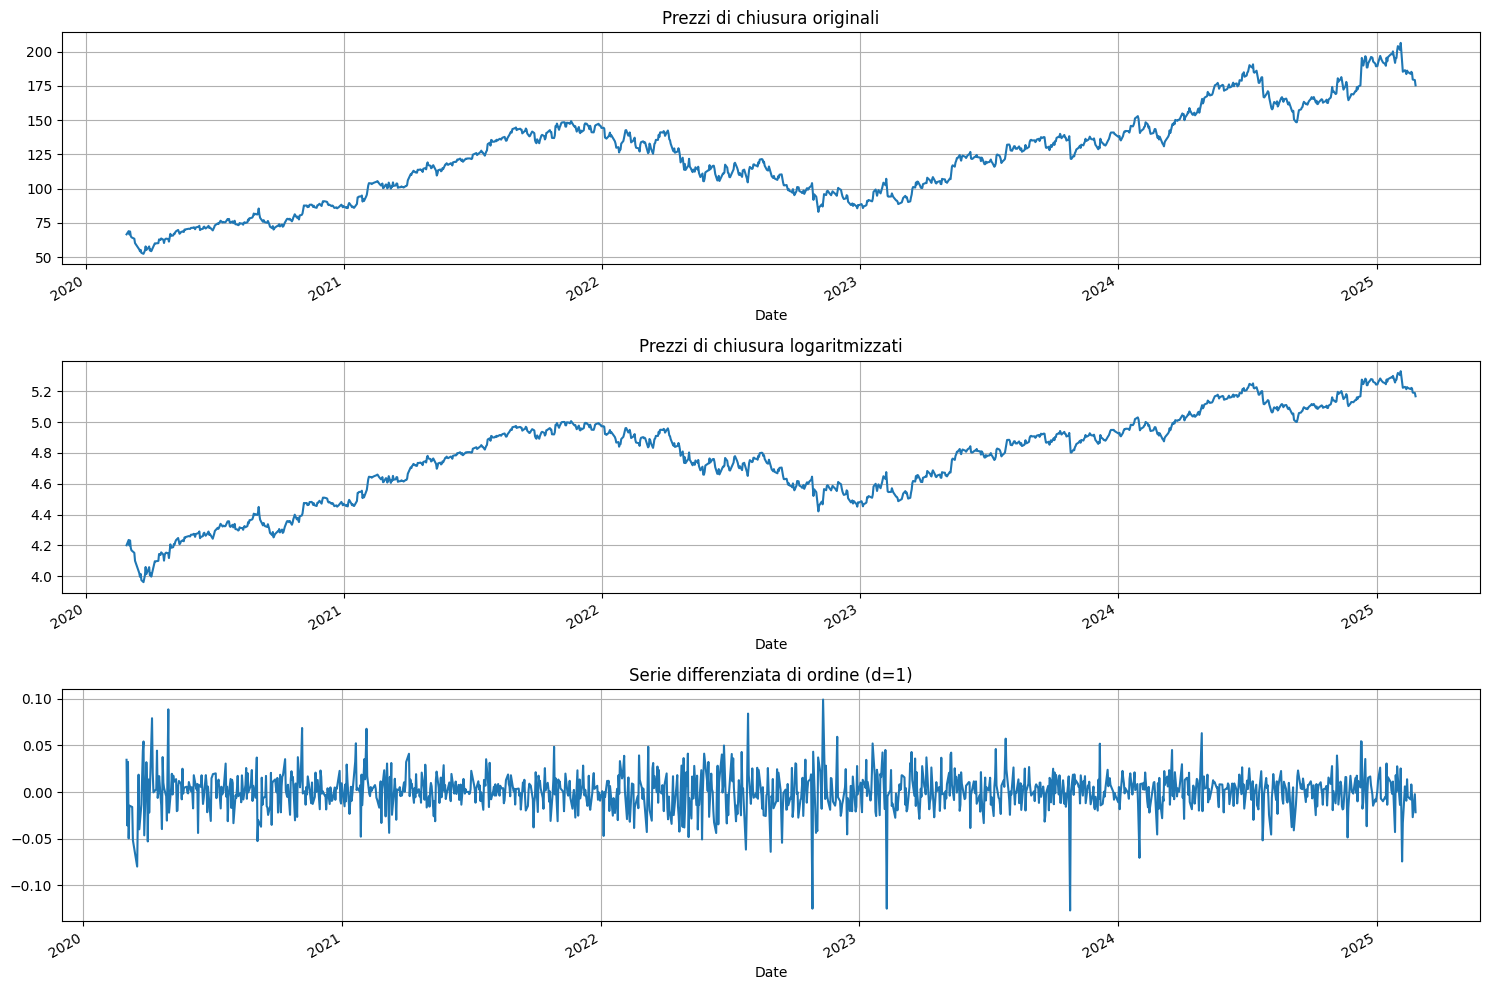

In [ ]:
# Visualizzazione
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
df['Close'].plot(title="Prezzi di chiusura originali", grid=True)

plt.subplot(3,1,2)
df['log_close'].plot(title="Prezzi di chiusura logaritmizzati", grid=True)

plt.subplot(3,1,3)
df['diff_log_close'].plot(title="Serie logaritmizzata e differenziata di ordine (d=1)", grid=True)

plt.subplot(3,1,4)
df['diff_close'].plot(title="Serie differenziata di ordine (d=1)", grid=True)

plt.tight_layout()
plt.show()

In [32]:
df['diff2_log_close'] = df['diff_log_close'].diff(1).dropna()

<Figure size 1200x400 with 0 Axes>

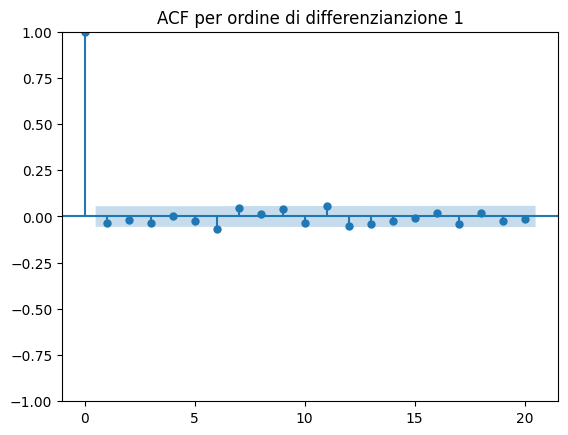

In [33]:
plt.figure(figsize=(12,4))
plot_acf(df['diff_log_close'].dropna(), lags=20, title='ACF per ordine di differenzianzione 1')
plt.show()

<Figure size 1200x400 with 0 Axes>

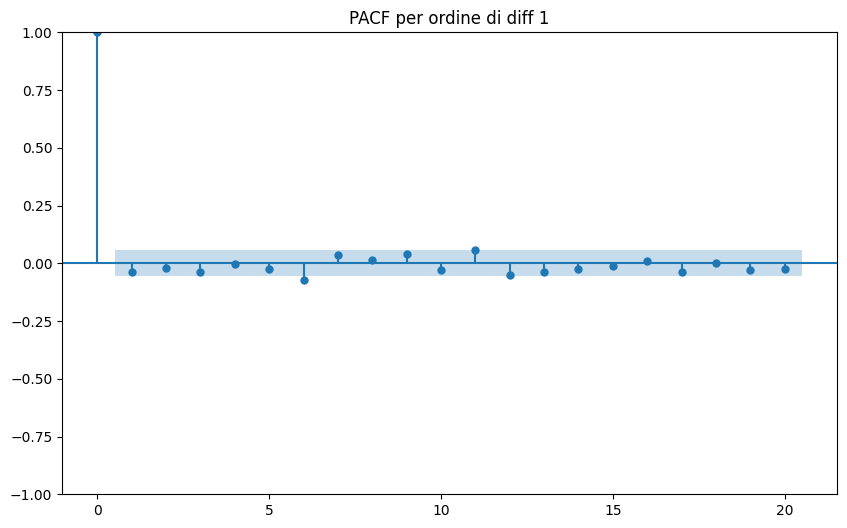

In [42]:
plt.figure(figsize=(12,4))
plot_pacf(df['diff_log_close'].dropna(), lags=20, title="PACF per ordine di diff 1")
plt.show()

<Figure size 1200x400 with 0 Axes>

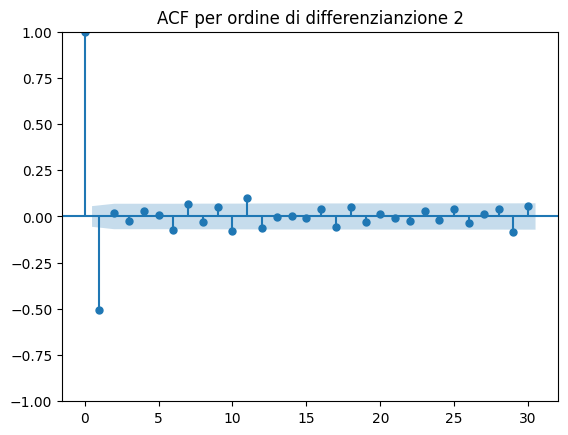

In [34]:
plt.figure(figsize=(12,4))
plot_acf(df['diff2_log_close'].dropna(), lags=20, title='ACF per ordine di differenzianzione 2')
plt.show()

<Figure size 1200x400 with 0 Axes>

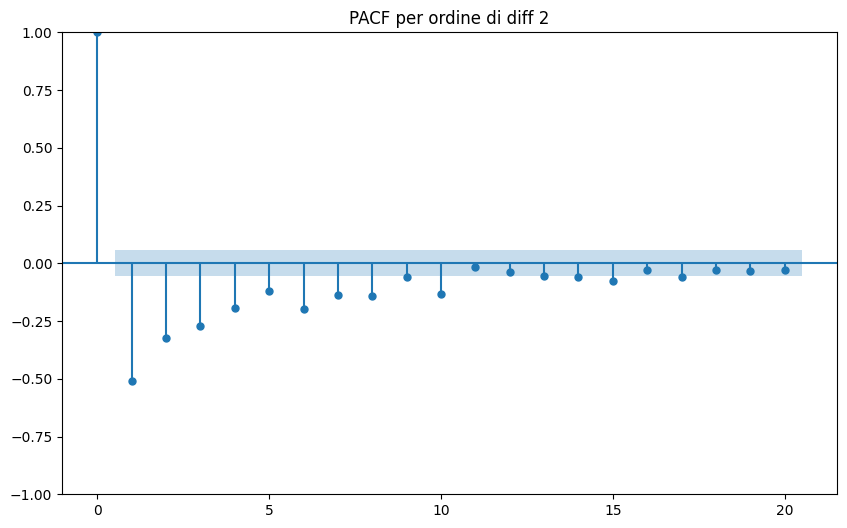

In [44]:
plt.figure(figsize=(12,4))
plot_pacf(df['diff2_log_close'].dropna(), lags=20, title="PACF per ordine di diff 2")
plt.show()

<Figure size 1200x400 with 0 Axes>

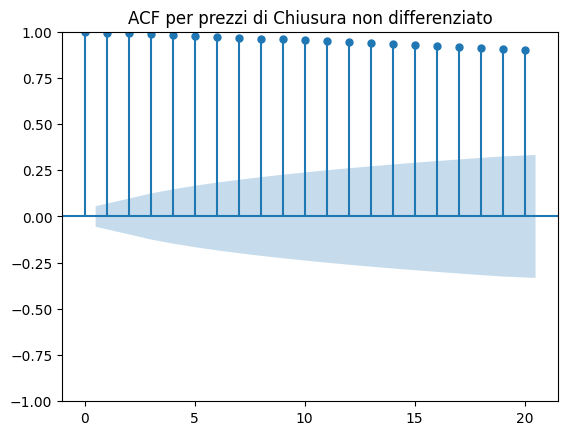

In [35]:
plt.figure(figsize=(12,4))
plot_acf(df['Close'].dropna(), lags=20, title='ACF per prezzi di Chiusura non differenziato')
plt.show()

In [1]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
stepwise_fit_log = auto_arima(df['diff_log_close'].dropna(), trace = True, suppress_warnings = True)
stepwise_fit_log.summary()

stepwise_fit_not_log= auto_arima(df['diff_close'].dropna(), trace = True, suppress_warnings = True)
stepwise_fit_not_log.summary()